# <center> PyTorch baseline for CIFAR10
**Код взят из [этого](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) тьюториала.**

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

**Загружаем данные.**

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

horse  deer  frog  deer


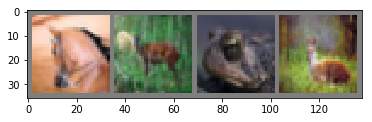

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Указываем архитектуру сети.**

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
# net.cuda()

**Указываем функцию потерь и оптимизатор.**

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**Обучаем мини-батчами, всего 10 эпох.**

In [7]:
from time import time

In [8]:
t1 = time()
for epoch in tqdm_notebook(range(10)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm_notebook(enumerate(trainloader, 0)):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

t2 = time()
print('Finished Training')

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 2.228
[1,  4000] loss: 1.879
[1,  6000] loss: 1.717
[1,  8000] loss: 1.627
[1, 10000] loss: 1.553
[1, 12000] loss: 1.507


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[2,  2000] loss: 1.432
[2,  4000] loss: 1.402
[2,  6000] loss: 1.397
[2,  8000] loss: 1.350
[2, 10000] loss: 1.362
[2, 12000] loss: 1.317


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[3,  2000] loss: 1.234
[3,  4000] loss: 1.243
[3,  6000] loss: 1.217
[3,  8000] loss: 1.229
[3, 10000] loss: 1.191
[3, 12000] loss: 1.215


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[4,  2000] loss: 1.111
[4,  4000] loss: 1.110
[4,  6000] loss: 1.128
[4,  8000] loss: 1.117
[4, 10000] loss: 1.132
[4, 12000] loss: 1.129


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[5,  2000] loss: 1.029
[5,  4000] loss: 1.044
[5,  6000] loss: 1.045
[5,  8000] loss: 1.044
[5, 10000] loss: 1.041
[5, 12000] loss: 1.042


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[6,  2000] loss: 0.959
[6,  4000] loss: 0.975
[6,  6000] loss: 0.982
[6,  8000] loss: 0.982
[6, 10000] loss: 0.982
[6, 12000] loss: 1.014


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[7,  2000] loss: 0.905
[7,  4000] loss: 0.914
[7,  6000] loss: 0.924
[7,  8000] loss: 0.933
[7, 10000] loss: 0.963
[7, 12000] loss: 0.955


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[8,  2000] loss: 0.854
[8,  4000] loss: 0.867
[8,  6000] loss: 0.891
[8,  8000] loss: 0.896
[8, 10000] loss: 0.911
[8, 12000] loss: 0.913


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[9,  2000] loss: 0.810
[9,  4000] loss: 0.830
[9,  6000] loss: 0.859
[9,  8000] loss: 0.892
[9, 10000] loss: 0.857
[9, 12000] loss: 0.876


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[10,  2000] loss: 0.771
[10,  4000] loss: 0.805
[10,  6000] loss: 0.828
[10,  8000] loss: 0.822
[10, 10000] loss: 0.845
[10, 12000] loss: 0.858

Finished Training


In [9]:
t2 - t1

378.7207679748535

**Прогноз для первого тестового мини-батча.**

GroundTruth:    cat  ship  ship plane


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x1258decf8>>
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 86, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/minicondabuild3/conda-bld/pytorch_1524590658547/work/torch/lib/libshm/core.cpp:125


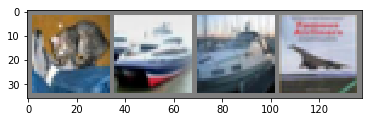

In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
outputs = net(Variable(images))

In [17]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


**Теперь прогноз для всего теста.**

In [18]:
all_pred = np.empty((0,10), float)

In [20]:
for data in tqdm_notebook(testloader):
    images, _ = data
    outputs = net(Variable(images))
    curr_pred = F.softmax(outputs.data).data.cpu().numpy()
    all_pred = np.vstack([all_pred, curr_pred])

HBox(children=(IntProgress(value=0, max=2500), HTML(value='')))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [21]:
all_pred.shape

(10000, 10)

In [22]:
pd.DataFrame(all_pred, columns=classes).to_csv('baseline.csv', index_label='id')